In [37]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import Lasso,Ridge, LinearRegression
from xgboost import XGBRegressor
df=pd.read_csv('../input/cardata/car data.csv')

In [2]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [6]:
print(df['Fuel_Type'].unique())

['Petrol' 'Diesel' 'CNG']


In [7]:
df= df.drop('Car_Name',axis=1)

In [8]:
df['current_year'] = 2022
df['years_old'] = df['current_year'] - df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,years_old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [9]:
df.drop(['Year'], axis=1,inplace=True)

In [10]:
df=pd.get_dummies(df,drop_first=True)

In [11]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,current_year,years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2022,8,0,1,0,1
1,4.75,9.54,43000,0,2022,9,1,0,0,1
2,7.25,9.85,6900,0,2022,5,0,1,0,1
3,2.85,4.15,5200,0,2022,11,0,1,0,1
4,4.60,6.87,42450,0,2022,8,1,0,0,1


In [12]:
df.drop(['current_year'], axis=1,inplace=True)

In [13]:
import seaborn as sns

In [14]:
#to find the correlation
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
years_old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [15]:
#sns.pairplot(df)
import matplotlib.pyplot as plt
%matplotlib inline

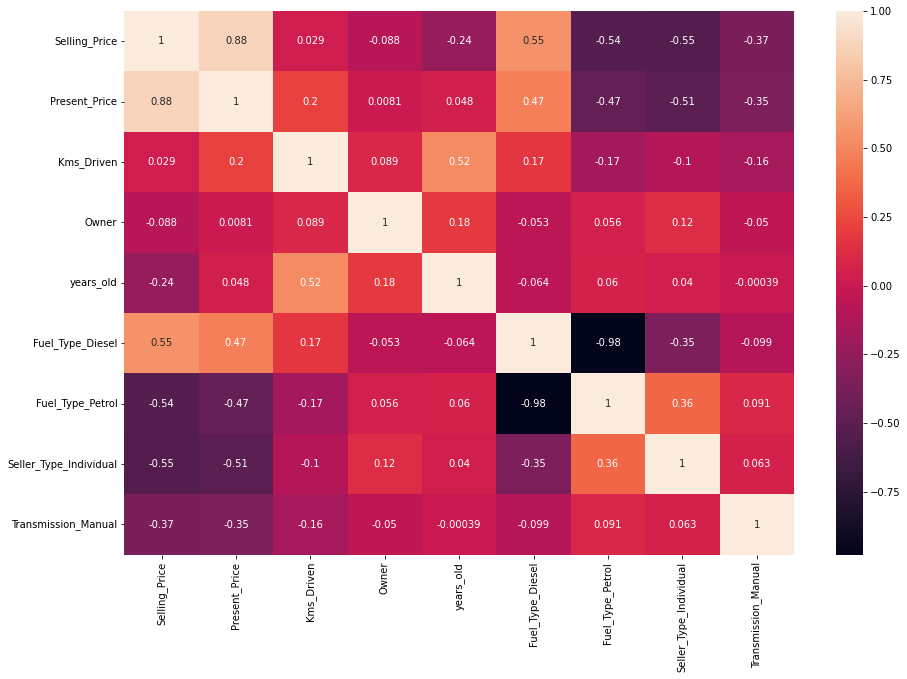

In [16]:
cor = df.corr()
top_corr= cor.index
plt.figure(figsize=(15,10))
g = sns.heatmap(df[top_corr].corr(),annot=True)

In [17]:
#dividing X and y
X= df.iloc[:,1:]
y=df.iloc[:,0]

In [18]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [19]:
print(model.feature_importances_)

[0.39565223 0.04113907 0.00085613 0.07671385 0.21444107 0.01692459
 0.12275063 0.13152243]


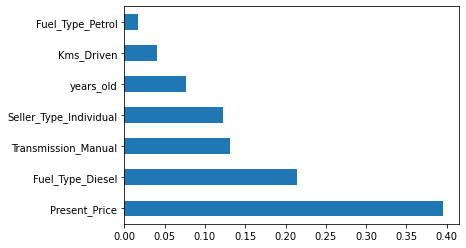

In [20]:
#plotting the features in visualized way
imp_features=pd.Series(model.feature_importances_,index=X.columns)
imp_features.nlargest(7).plot(kind='barh')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [22]:
#tuning the randomforestregressor
n_estimators = [int(x) for x in np.linspace(start=80, stop=400, num=40)]

max_features = ['auto','sqrt']

max_depth = [int(x) for x in np.linspace(5,28,num=10)]
min_samples_leaf = [1, 2, 3, 4]

min_samples_split = [2,5,10,15,100]

min_samples_leaf = [1,2,5,10]
bootstrap = [True, False]


In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [24]:
RF_grid = {'n_estimators': n_estimators,
          'max_features':max_features,
            'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'bootstrap': bootstrap,
           'min_samples_split':min_samples_split
          }


print(RF_grid)

{'n_estimators': [80, 88, 96, 104, 112, 121, 129, 137, 145, 153, 162, 170, 178, 186, 194, 203, 211, 219, 227, 235, 244, 252, 260, 268, 276, 285, 293, 301, 309, 317, 326, 334, 342, 350, 358, 367, 375, 383, 391, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 7, 10, 12, 15, 17, 20, 22, 25, 28], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10], 'bootstrap': [True, False]}


In [25]:
forest= RandomForestRegressor()

In [26]:
rf_grid = RandomizedSearchCV(forest, param_distributions=RF_grid,scoring='neg_mean_squared_error',
                             cv=5,random_state=101,n_jobs=1) #,verbose=2

In [27]:
#verbose is ussed to show the details below, i dont want 
rf_grid.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 7, 10, 12, 15, 17, 20,
                                                      22, 25, 28],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 88, 96, 104, 112,
                                                         121, 129, 137, 145,
                                                         153, 162, 170, 178,
                                                         186, 194, 203, 211,
                                                         219, 227, 235, 244,
                                   

In [28]:
prediction= rf_grid.predict(X_test)

In [29]:
prediction

array([ 3.19651163,  0.54015504,  5.48953488, 17.41565891,  5.56356589,
        5.0872093 ,  0.58217054,  0.45984496,  7.87829457,  5.76085271,
        7.55581395,  1.11984496,  1.51015504,  4.4996124 , 17.23403101,
        0.5127907 ,  2.33023256,  0.24193798,  0.72682171, 15.4524031 ,
        9.83651163,  6.38062016,  2.89736434,  5.71937984,  4.0627907 ,
        0.19286822,  2.92131783,  0.20565891,  7.56782946,  0.38294574,
        4.95465116,  5.19379845,  1.5375969 ,  0.47217054,  1.12472868,
        2.48565891,  3.4124031 ,  0.42085271,  5.10705426,  0.72248062,
        3.99457364,  5.31782946,  4.46162791,  2.95      ,  9.88914729,
        0.44906977,  0.31325581,  2.64573643,  5.13062016,  0.5575969 ,
        5.4120155 , 22.24333333,  0.41449612,  2.55348837,  5.51821705,
        5.16395349,  6.82945736,  0.43620155, 10.66914729,  4.50209302,
        3.1244186 ])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

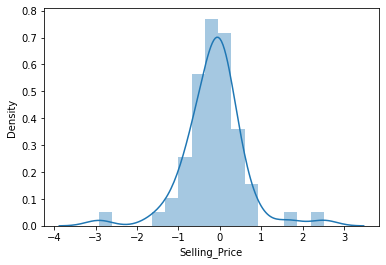

In [30]:
sns.distplot(y_test-prediction)

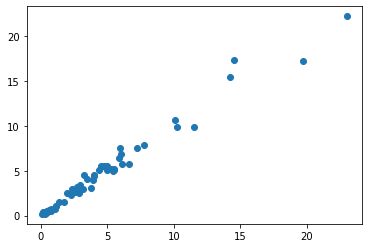

In [31]:
#linearly available and formed gaussian dist means predicions are good
plt.scatter(y_test,prediction)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,prediction))

0.5411839835641994


In [33]:
print(r2_score(y_test,prediction))

0.9740675106166151


#  **Using Gradient, Ridge, Lasso**

In [39]:
models = {'Lasso':Lasso(),'Linear':LinearRegression(),'Ridge':Ridge(),'xgboost':XGBRegressor()}

In [40]:
for model_name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'Mean Squared Error for {model_name}')
    print(mean_squared_error(y_test,y_pred))
    print(f'r2 Score for {model_name}')
    print(r2_score(y_test,y_pred)*100)
    print('----------------------')

Mean Squared Error for Lasso
2.6875361760821477
r2 Score for Lasso
87.12184664174465
----------------------
Mean Squared Error for LInear
3.125441330991749
r2 Score for LInear
85.02348986743048
----------------------
Mean Squared Error for Ridge
3.1007329677093196
r2 Score for Ridge
85.14188756358595
----------------------
Mean Squared Error for xgboost
1.1257001169643874
r2 Score for xgboost
94.60586284542343
----------------------


In [ ]:
import pickle

filename = 'random_forest_carprice.pkl'


file = open ('random_forest_carprice','wb')

pickle.dump(rf_grid,file)

filename = 'carprice_forest.pkl'
pickle.dump(rf_grid,open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('carprice_forest.pkl','rb'))